# **Caso: Predicción de abandono de clientes en una empresa de telecomunicaciones**
**Contexto:**

Una empresa de telecomunicaciones quiere reducir la pérdida de clientes (churn). Para ello, te han proporcionado un conjunto de datos históricos sobre sus clientes actuales y pasados. Tu tarea es analizar estos datos y construir un modelo que prediga la probabilidad de que un cliente abandone la empresa.

🧭 Tareas a realizar

1. Análisis Exploratorio de Datos (EDA)

  * Describir el conjunto de datos: tipos de variables, valores nulos, estadísticas básicas.

  * Visualizaciones clave (distribuciones, correlaciones, etc.).

  * Identificar patrones relacionados con el abandono (Churn).

2. Limpieza y Preparación de Datos

  * Tratamiento de valores nulos.

  * Codificación de variables categóricas.

  * Normalización o estandarización si es necesario.

3. Modelado Predictivo

  * Separar conjunto de entrenamiento y prueba.

  * Probar al menos dos modelos de clasificación (ej: Regresión Logística, Árboles de Decisión, Random Forest, etc.).

  * Evaluar los modelos (precisión, recall, F1-score, curva ROC).

5. Interpretación y Recomendaciones

  * ¿Qué variables son más importantes para predecir el churn?

  * ¿Qué acciones propondrías a la empresa para reducir la pérdida de clientes?

6. Entrega

  * Un notebook Jupyter o Google Colab con el análisis completo.

  * Un resumen ejecutivo (máximo 1 página) explicando los hallazgos clave y recomendaciones, escrito para alguien no técnico.

In [1]:
# ------------------------- Librerias requeridas --------------------------------------------

# Tratamiento de datos
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score

# Visualización de datos    
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from matplotlib.pyplot import figure
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import plotly.express as px

# Selección de variables y medición del desempeño
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

# Modelos Candidatos 
from sklearn.linear_model import LogisticRegression      # Regresión logística
from sklearn.ensemble import RandomForestClassifier      # Clasificador bosques aleatorios
from xgboost import XGBClassifier                        # XGBoost 

# Datos
#!pip install "kagglehub[pandas-datasets]"
import kagglehub as kg
from kagglehub import KaggleDatasetAdapter

# Funciones propias
import funciones as fnc


##  Exploración inicial de los datos 

In [2]:
# Importación de los datos
file_path = "WA_Fn-UseC_-Telco-Customer-Churn.csv"

df = kg.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "blastchar/telco-customer-churn",
  file_path,
)

C:\Users\gvand\AppData\Local\Temp\ipykernel_12880\3277287894.py:4: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kg.load_dataset(


In [3]:
# Información general de los datos 
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
# Verificación de Nulos y duplicados
df.isna().sum()          
df.duplicated().sum()     

0

In [5]:
# Descripción estadística
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
# Transformacion de la Variable "TotalCharges"
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan) # Este código fue necesario debido a que presentaba datos NaN
df['TotalCharges'] = df['TotalCharges'].astype(float) 

In [7]:
# Información general de los datos 
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
# Datos faltantes
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
# Eliminar datos "NaN"
df = df.dropna(subset=['TotalCharges']).reset_index(drop=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


Conclusiones: 
- La base de datos no presenta valores nulos ni registros duplicados.
- El conjunto de datos está compuesto por 21 variables, las cuales se distribuyen entre variables numéricas, categóricas y binarias.
- El análisis estadístico muestra que solo el 16 % de los clientes son adultos mayores, con una antigüedad promedio de 32 meses y gastos mensuales medios de 64,76.
- Fue necesario realizar una primera transformación en la variable "TotalCharges", ya que aunque representa valores numéricos, originalmente estaba clasificada como texto (object). Esta conversión fue esencial para el análisis exploratorio.
- Dado que los valores NaN en la variable "TotalCharges" representan solo una fracción muy pequeña del total (11 de 7,043 registros), se optó por eliminar estas filas.
- Tras la eliminación de los 11 registros que presentaban valores "NaN" en la variable "TotalCharges", el conjunto de datos quedó conformado por 7,032 registros

## Análisis Exploratorio de Datos (EDA)

### Análisis Variable Objetivo

In [11]:
# Variable Respuesta (target)
print(df['Churn'].value_counts())
_ = df['Churn'].value_counts()

# Crear el gráfico de torta
fig = px.pie(values = _, names = _.index)
fig.show()

Churn
No     5163
Yes    1869
Name: count, dtype: int64


Conclusiones: 
- El 26.5% han renunciado al servicio, equivalente a un total de 1,869 clientes. 
- La distribución de clases binarias presenta un desequilibrio moderado. 

### Análisis de Variables Categóricas

In [12]:
# Información de las variables categóricas
cat_cols = df.select_dtypes(include=['object', 'category']).columns
cat_cols = [col for col in cat_cols if col not in ['customerID', 'Churn']]

for col in cat_cols:
    print(f"--- {col} ---")
    print(df[col].value_counts(dropna=False))
    print("\n")

--- gender ---
gender
Male      3549
Female    3483
Name: count, dtype: int64


--- Partner ---
Partner
No     3639
Yes    3393
Name: count, dtype: int64


--- Dependents ---
Dependents
No     4933
Yes    2099
Name: count, dtype: int64


--- PhoneService ---
PhoneService
Yes    6352
No      680
Name: count, dtype: int64


--- MultipleLines ---
MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64


--- InternetService ---
InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64


--- OnlineSecurity ---
OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64


--- OnlineBackup ---
OnlineBackup
No                     3087
Yes                    2425
No internet service    1520
Name: count, dtype: int64


--- DeviceProtection ---
DeviceProtection
No                     3094
Yes                    2418
No internet ser

In [13]:
# Genero
fnc.vovsenc(df, 'gender', 'Count', 'Churn')

- No se observa una dominancia de género en el abandono; las mujeres superan a los hombres solo por 9 casos

In [14]:
# Personas mayores
fnc.vovsenc(df, 'SeniorCitizen', 'Count', 'Churn')

- La mayoría de los clientes no son ciudadanos senior.
- Entre los clientes que sí son ciudadanos senior, aunque son muchos menos, la proporción de clientes que se van  es visiblemente mayor en comparación con los no seniors.

In [15]:
# Pareja
fnc.vovsenc(df, 'Partner', 'Count', 'Churn')

- Los clientes que no tienen pareja muestran una mayor proporción de deserción.

In [16]:
# Personas dependientes
fnc.vovsenc(df, 'Dependents', 'Count', 'Churn')

- Los clientes que no son dependientes son más propensos a cancelar el servicio.

In [17]:
# Contrato
fnc.vovsstr(df, 'Contract', 'Count', 'Churn')

- Los clientes con contrato mensual tienen una probabilidad de desertar significativamente mayor que aquellos con contratos anuales o bienales.

In [18]:
# Servicio de internet
fnc.vovsstr(df, 'InternetService', 'Count', 'Churn')

- Los clientes con Internet de fibra óptica son más propensos a desertar que los que tienen DSL o no tienen servicio.

In [19]:
# Soporte técnico
fnc.vovsstr(df, 'TechSupport', 'Count', 'Churn')

- Tener soporte técnico parece estar asociado con una menor tasa de deserción.
- Los clientes sin soporte técnico probablemente experimenten problemas no resueltos, lo que podría motivar su salida.

In [20]:
# Metodo de pago
fnc.vovsstr(df, 'PaymentMethod', 'Count', 'Churn')

- Los clientes que usan cheque electronico son más propensos a desertar que los otros metodos de pago.

### Análisis de Variables Numericas

In [21]:
# Permanencia
fnc.vovsnum(df, 'Churn', 'tenure')

Conclusiones: 
- Los clientes que no hacen churn suelen tener un mayor tiempo de permanencia, con una mediana claramente más alta. Esto indica mayor fidelidad.
- La mayoría de los clientes que hacen churn lo hacen en los primeros meses. 

In [22]:
fnc.vovsnum(df, 'Churn', 'MonthlyCharges')

Conclusiones: 
- Los clientes que hacen churn tienen cargos mensuales más altos en promedio. 
- Los que no hacen churn tienden a tener cargos mensuales más bajos y variados.

In [23]:
fnc.vovsnum(df, 'Churn', 'TotalCharges')

Conclusiones: 
- Los clientes que desertan tienen cargos totales mucho más bajos, lo que indica que permanecen poco tiempo con la empresa.


## Modelos

### Terminar preprocesado

In [24]:
# Reemplazar "No internet service" y "No phone service" por "No"
df.replace(['No internet service', 'No phone service'], 'No', inplace=True)

In [25]:
# Asignar categoria a "SeniorCitizen"
SeniorCitizen = {
    0:'Yes',
    1:'No'}
df.SeniorCitizen = df.SeniorCitizen.replace(SeniorCitizen)

In [26]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,Yes,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,Yes,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,Yes,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,Yes,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [27]:
# Asignar categoria a "gender"
df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0}).astype(float)

In [28]:
# Convertir "Yes" a 1 y "No" a 0
df = df.replace({'Yes': 1, 'No': 0})

In [29]:
# Eliminar variable "customerID"
df.drop(["customerID"], axis=1, inplace=True)

In [30]:
# Recategorización de la variable "tenure"
condicion = [((df.tenure >= 0)&(df.tenure <= 12)), ((df.tenure > 12)&(df.tenure <= 24)), 
    ((df.tenure > 24)&(df.tenure <= 36)),((df.tenure > 36)&(df.tenure <= 48)),
    ((df.tenure > 48)&(df.tenure <= 60)), (df.tenure > 60)]

opcion = ['0-1año', '1-2años', '2-3años', '3-5años', '4-5años', '5 o más']

df['tenure_ran'] = np.select(condicion, opcion)
df.drop(["tenure"], axis=1, inplace=True)

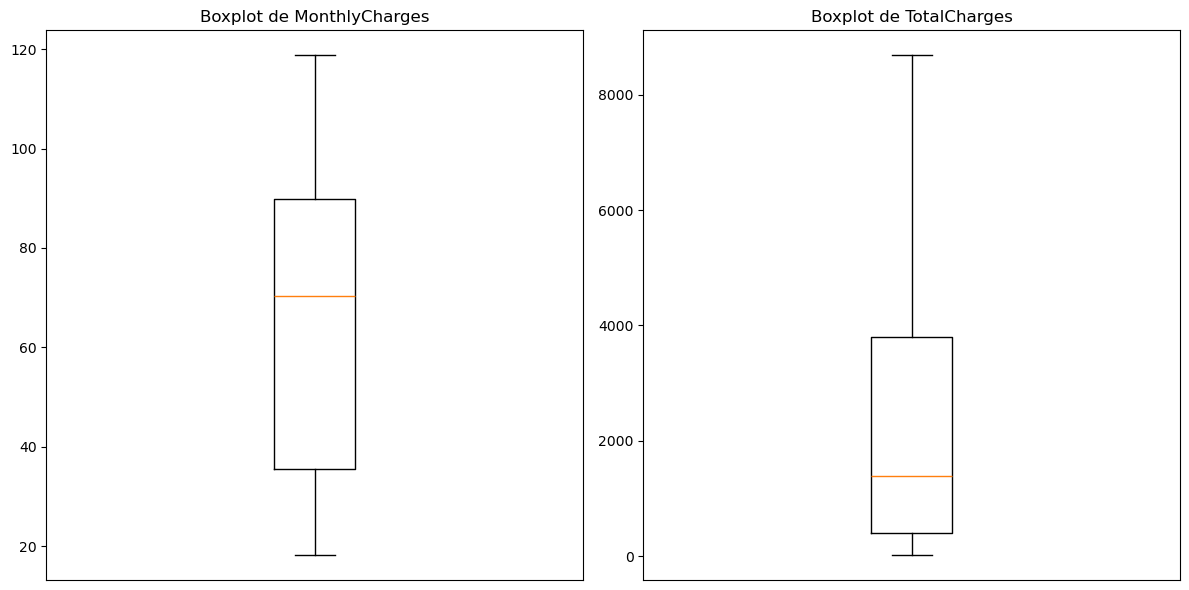

In [31]:
# Tratamiento de atípicos 
var = ['MonthlyCharges', 'TotalCharges'] 
 
fig, axes = plt.subplots(1, len(var), figsize=(12, 6))

for i, v in enumerate(var):
    axes[i].boxplot(df[v].dropna())
    axes[i].set_title(f'Boxplot de {v}')
    axes[i].set_xticks([])

plt.tight_layout()
plt.show()

No hay presencia de atípicos, por lo que no fue necesario un tratamiento.  

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   float64
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   PhoneService      7032 non-null   int64  
 5   MultipleLines     7032 non-null   int64  
 6   InternetService   7032 non-null   object 
 7   OnlineSecurity    7032 non-null   int64  
 8   OnlineBackup      7032 non-null   int64  
 9   DeviceProtection  7032 non-null   int64  
 10  TechSupport       7032 non-null   int64  
 11  StreamingTV       7032 non-null   int64  
 12  StreamingMovies   7032 non-null   int64  
 13  Contract          7032 non-null   object 
 14  PaperlessBilling  7032 non-null   int64  
 15  PaymentMethod     7032 non-null   object 
 16  MonthlyCharges    7032 non-null   float64


In [33]:
# Dummies
list_cat =  [
   "InternetService","Contract","PaymentMethod","tenure_ran"]

df2 = fnc.imputar_f(df,list_cat)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   InternetService  7032 non-null   object
 1   Contract         7032 non-null   object
 2   PaymentMethod    7032 non-null   object
 3   tenure_ran       7032 non-null   object
dtypes: object(4)
memory usage: 219.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   float64
 1   SeniorCitizen     7032 non-null   float64
 2   Partner           7032 non-null   float64
 3   Dependents        7032 non-null   float64
 4   PhoneService      7032 non-null   float64
 5   MultipleLines     7032 non-null   float64
 6   OnlineSecurity    7032 non-null   float64
 7   OnlineBackup      7032 non-null   float64
 8   

In [34]:
list_dummies = [
   "InternetService","Contract","PaymentMethod","tenure_ran"]

df_dummies=pd.get_dummies(df2,columns=list_dummies)
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 32 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   float64
 1   SeniorCitizen                            7032 non-null   float64
 2   Partner                                  7032 non-null   float64
 3   Dependents                               7032 non-null   float64
 4   PhoneService                             7032 non-null   float64
 5   MultipleLines                            7032 non-null   float64
 6   OnlineSecurity                           7032 non-null   float64
 7   OnlineBackup                             7032 non-null   float64
 8   DeviceProtection                         7032 non-null   float64
 9   TechSupport                              7032 non-null   float64
 10  StreamingTV                              7032 no

### Selección de variables (Método Wrapper)

In [35]:
# División de datos 
y = df_dummies.Churn             
X1= df_dummies.loc[:,~df_dummies.columns.isin(['Churn'])]

In [36]:
# Escalar variables
scaler=StandardScaler()
scaler.fit(X1)
X2=scaler.transform(X1)
X=pd.DataFrame(X2,columns=X1.columns)

In [37]:
# Modelos de clasificación binaria - Regresión logísitica, Random Forest y XGBoost
m_lr = LogisticRegression()  
m_rf = RandomForestClassifier()
m_xgb = XGBClassifier()

modelos = list([m_lr, m_rf, m_xgb])

In [39]:
# Función de selección de variables por RFE
var_names=fnc.sel_variables(modelos,X,y,threshold="2.5*mean")
var_names.shape

(6,)

In [45]:
# Resultados selección
X2=X[var_names] 
X2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Contract_Month-to-month      7032 non-null   float64
 1   Contract_Two year            7032 non-null   float64
 2   InternetService_0            7032 non-null   float64
 3   InternetService_Fiber optic  7032 non-null   float64
 4   MonthlyCharges               7032 non-null   float64
 5   TotalCharges                 7032 non-null   float64
dtypes: float64(6)
memory usage: 329.8 KB


### Selección de modelo

In [46]:
# Función pra evaluar los modelos
def medir_modelos(modelos, scoring, X, y, cv):

    metric_modelos = pd.DataFrame()
    for modelo in modelos:
        scores = cross_val_score(modelo, X, y, scoring = scoring, cv = cv )
        pdscores = pd.DataFrame(scores)
        metric_modelos = pd.concat([metric_modelos,pdscores], axis = 1)
    
    metric_modelos.columns = ["logistic_r","rf_classifier","xgboost_classifier"]
    return metric_modelos

In [ ]:
# Desempeño con todas las variables
rec_df = medir_modelos(modelos, 'recall', X, y, 4)
rec_df

,logistic_r,rf_classifier,xgboost_classifier
0,0.528908,0.471092,0.492505
1,0.481799,0.462527,0.503212
2,0.537473,0.501071,0.509636
3,0.502137,0.476496,0.489316


In [48]:
# Desempeño con variables seleccionadas
reca_df_sel = medir_modelos(modelos, 'recall', X2, y, 4)
reca_df_sel

,logistic_r,rf_classifier,xgboost_classifier
0,0.531049,0.496788,0.524625
1,0.488223,0.475375,0.475375
2,0.498929,0.464668,0.505353
3,0.487179,0.474359,0.485043


<Axes: title={'center': 'Desempeño con varibles seleccionadas'}>

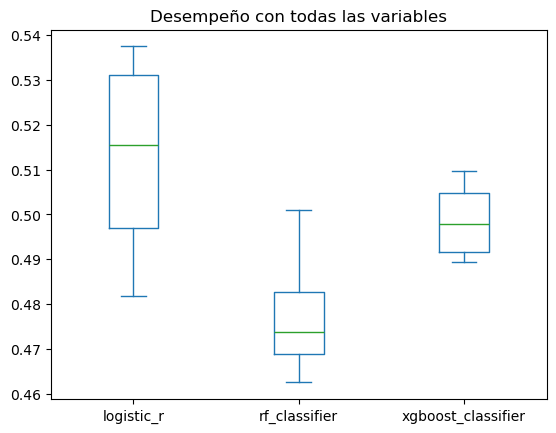

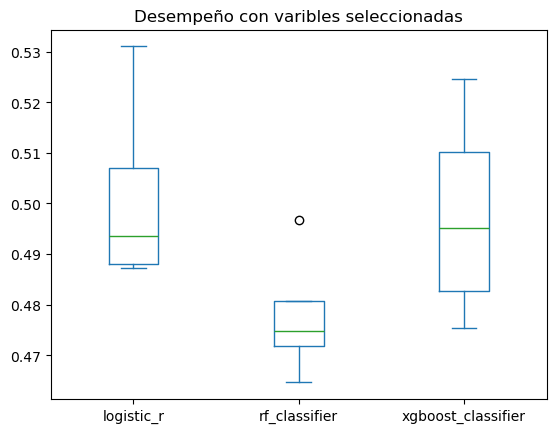

In [49]:
# Distribución del desempeño
rec_df.plot(kind = 'box', title= 'Desempeño con todas las variables')
reca_df_sel.plot(kind = 'box', title= 'Desempeño con varibles seleccionadas')

Conclusiones:
- Se utiliza recall como métrica principal porque es clave identificar correctamente a los clientes positivos, minimizando el riesgo de pasarlos por alto, especialmente en contextos con clases desbalanceadas.
- La selección de variables no tiene un impacto positivo; en ciertos escenarios, incluso empeora el rendimiento.
- Los gráficos muestran que XGBClassifie con todas las variables presenta mayor estabilidad frente a los demás modelos.


### Modelo

In [54]:
# Parámetros
param_grid = [{'max_depth': [3,4,5,6,7], 'eta':[0.01, 0.09, 0.1, 0.2, 0.4],'subsample': [0,3,0.4,0.5,0.7]}]

research = RandomizedSearchCV(m_xgb, param_distributions = param_grid,
                              n_iter = 5, scoring='accuracy')
research.fit(X2, y)

resultados = research.cv_results_
research.best_params_
df_resultados = pd.DataFrame(resultados)
df_resultados[["params","mean_test_score"]].sort_values(by = "mean_test_score", ascending = False)

# Modelo con los mejores parámetros
xg_final = research.best_estimator_

In [ ]:
predictions = cross_val_predict(xg_final, x_selec, y, cv = 5)
df_pred = pd.DataFrame(predictions, columns = ['pred']) 

# Se añade las predicciones a la base de datos inicial
df_final = pd.concat([df_features, df_pred], axis = 1)

# Matriz de confusión para validación
conf_matrix = confusion_matrix(df_features['target'], df_final['pred'])
plt.figure(figsize = (8, 6))
sns.heatmap(conf_matrix, annot = True, fmt = "d", cmap = "Blues")
plt.xlabel('Valores predichos')
plt.ylabel('Valores reales observados')
plt.title('Matriz de confusión')
plt.show()
